In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeRegressor


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score




sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [2]:
df= pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

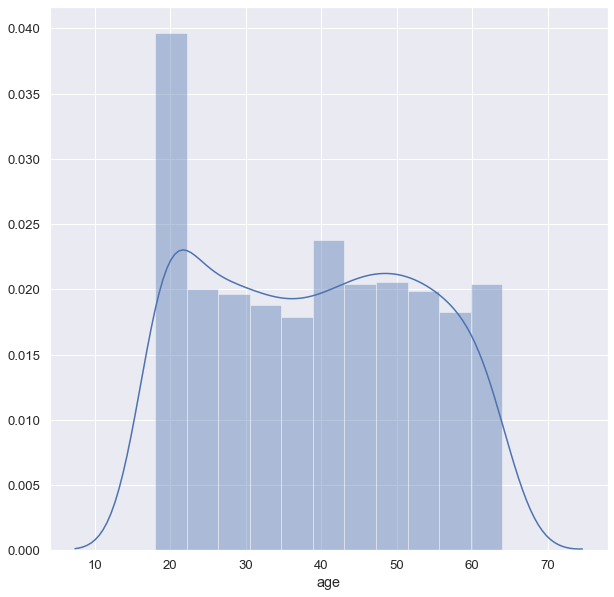

In [7]:
sns.distplot(df['age'])

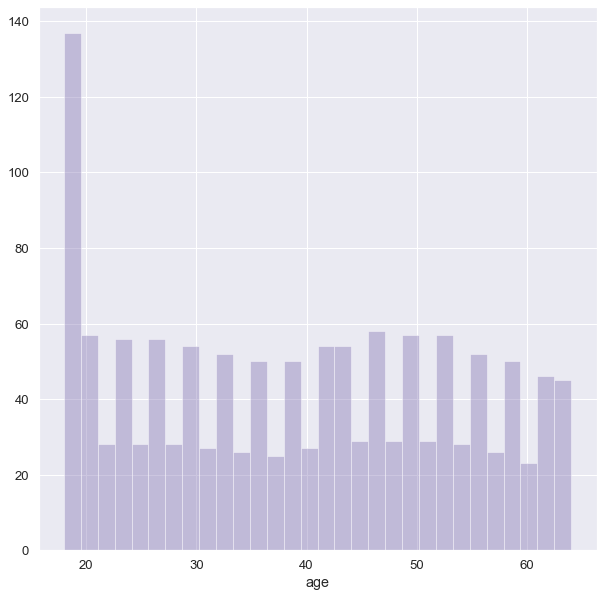

In [8]:
sns.distplot(df['age'], kde=False, bins=30, color='m')

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


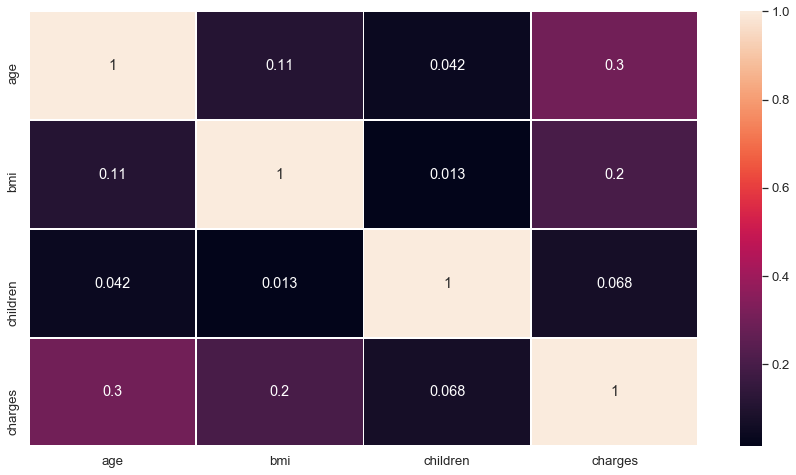

In [10]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 1)
plt.show()

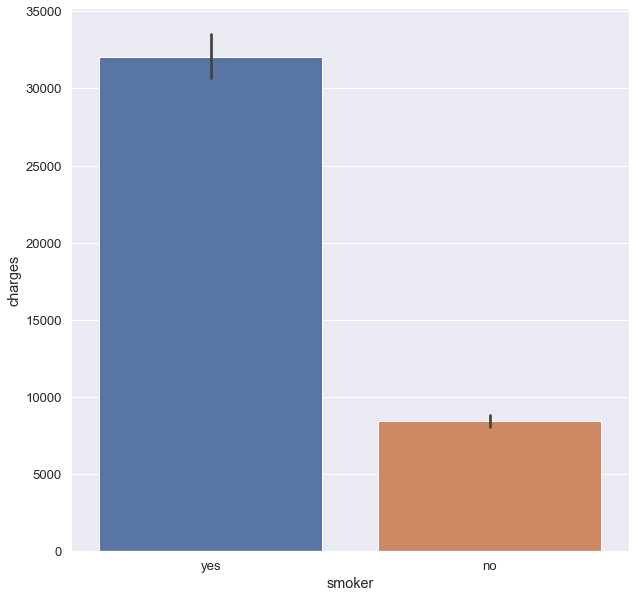

In [11]:
sns.barplot(x='smoker',y='charges',data=df)

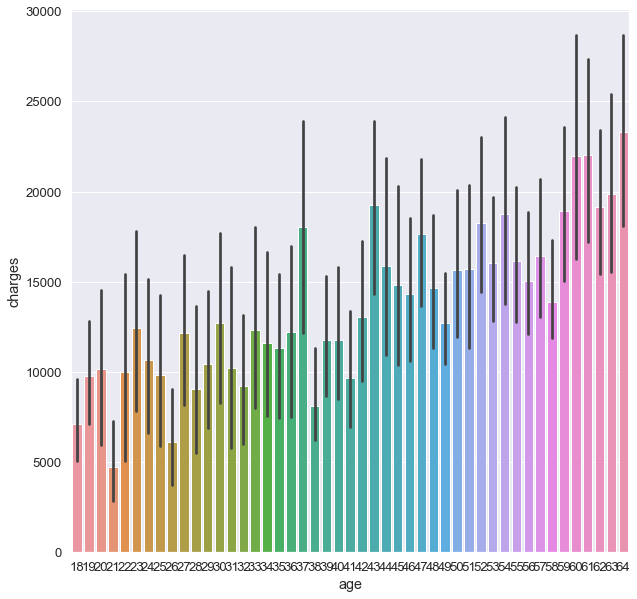

In [12]:
sns.barplot(x='age',y='charges',data=df)

<Figure size 720x720 with 0 Axes>

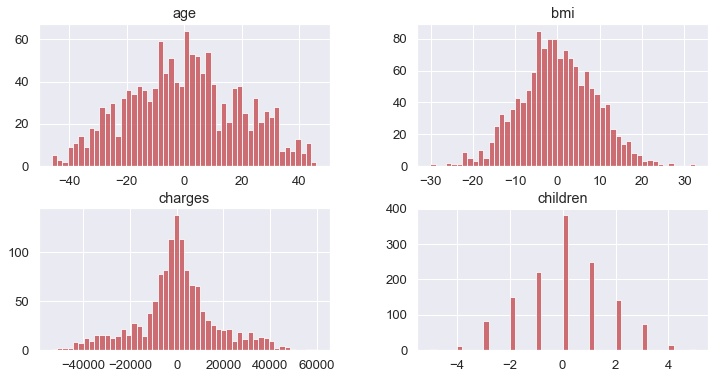

In [13]:
plt.figure();

df[['age', 'bmi', 'children', 'charges']].diff().hist(color="r", alpha=0.8, bins=50, figsize=(12, 6));

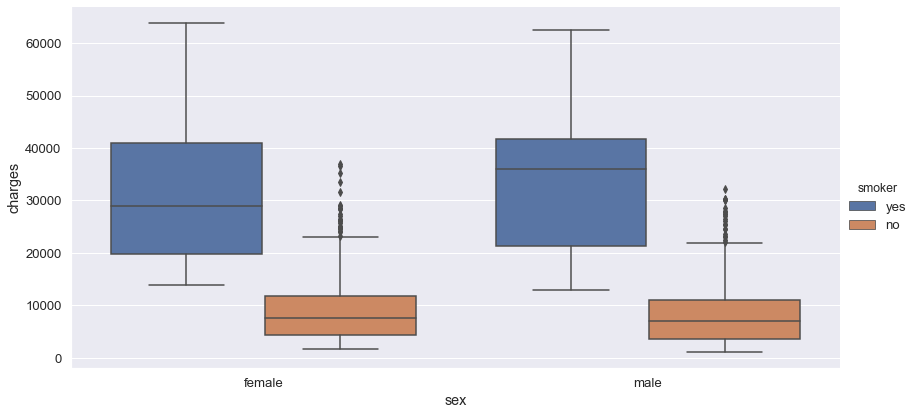

In [14]:
sns.catplot(x = 'sex', y = 'charges', hue = 'smoker', data = df, kind = 'box',
            height = 6, aspect = 2)
plt.show()

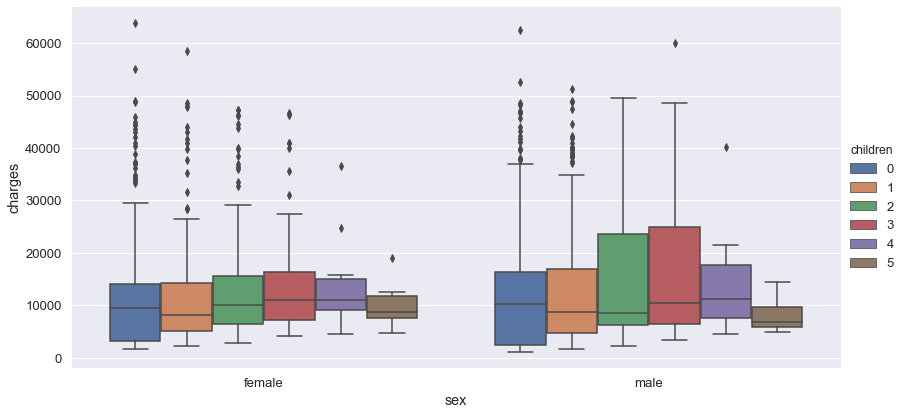

In [15]:
sns.catplot(x = 'sex', y = 'charges', hue = 'children', data = df, kind = 'box',
            height = 6, aspect = 2)
plt.show()

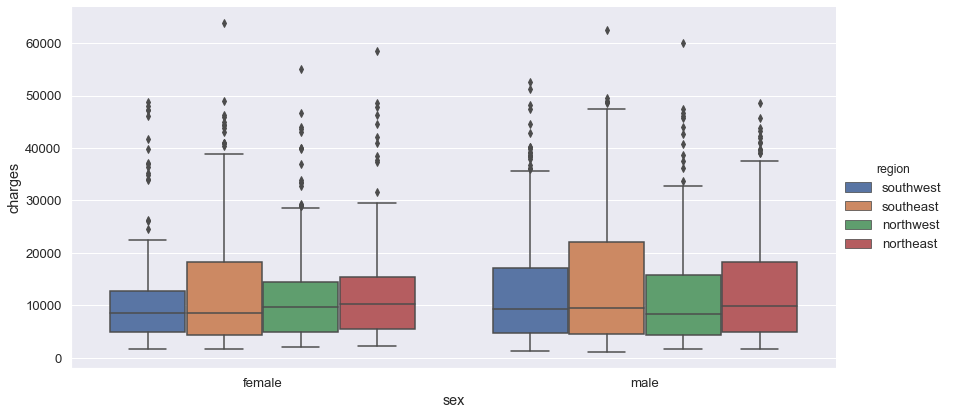

In [16]:
sns.catplot(x = 'sex', y = 'charges', hue = 'region', data = df, kind = 'box',
            height = 6, aspect = 2)
plt.show()

Patients who smoke have high bmi and high charges.

In [17]:
df_child = df.groupby(['children'])['charges'].mean().reset_index()
df_child

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


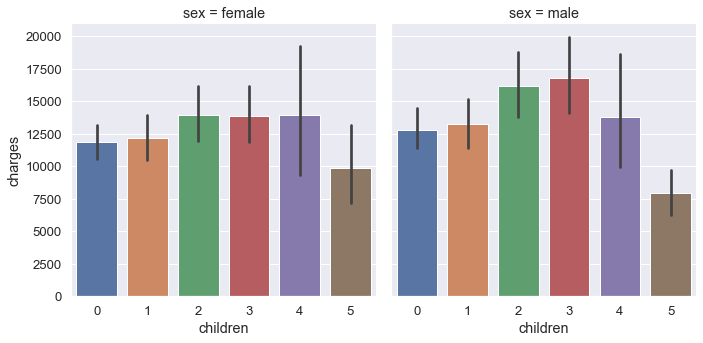

In [18]:
sns.catplot(x = 'children', y = 'charges', col = 'sex', data = df, kind = 'bar')
plt.show()

-Patients having 2/3 children have the highest average charges may be because patients having 2/3 children are also       smoker.
-Male patients having children have high charges than female patients.
-Highest patients having 2 children are from southwest region.



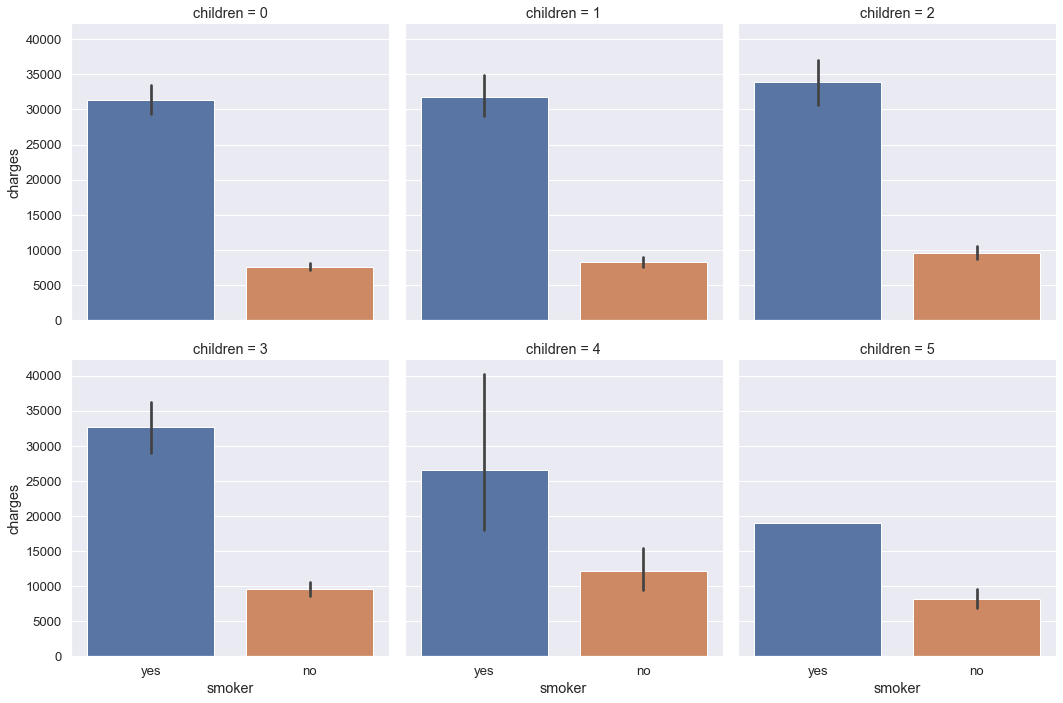

In [19]:
sns.catplot(x = 'smoker', y = 'charges', col = 'children', data = df, kind = 'bar', col_wrap = 3)
plt.show()

-Patients which are smoker pay high charges.

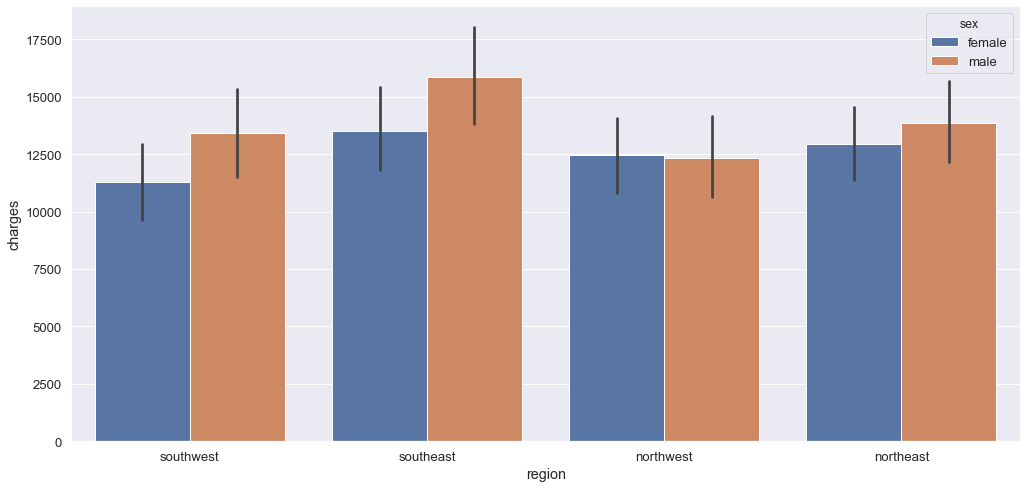

In [20]:
plt.figure(figsize = (17, 8))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df)
plt.show()

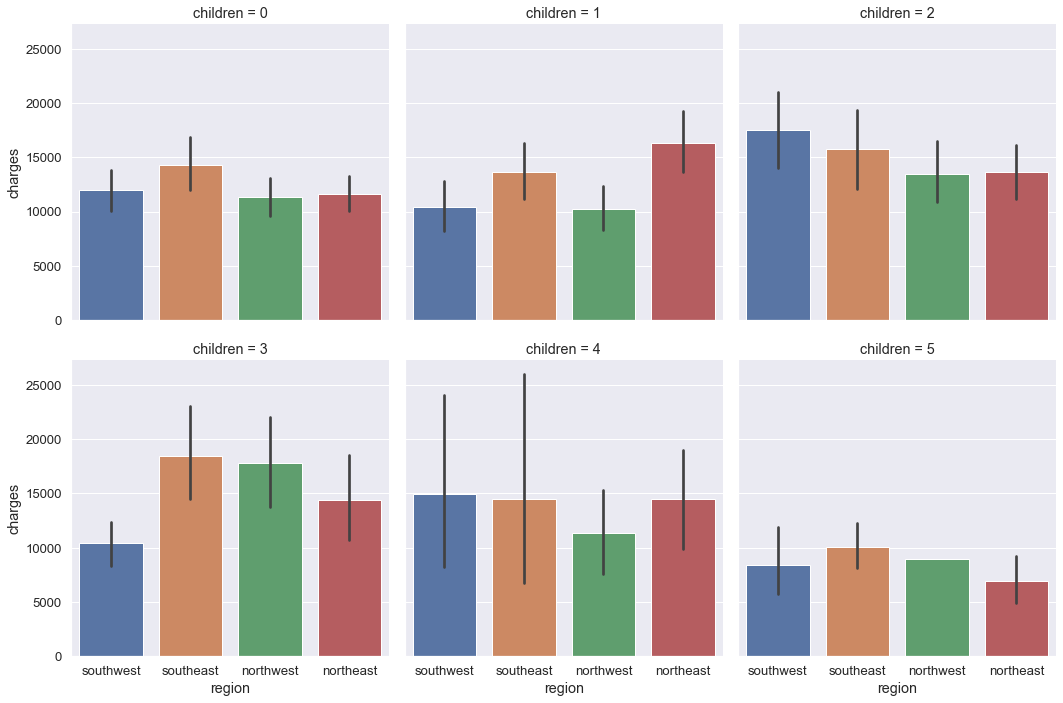

In [21]:
sns.catplot(x = 'region', y = 'charges', col = 'children', data = df, kind = 'bar', col_wrap = 3)
plt.show()

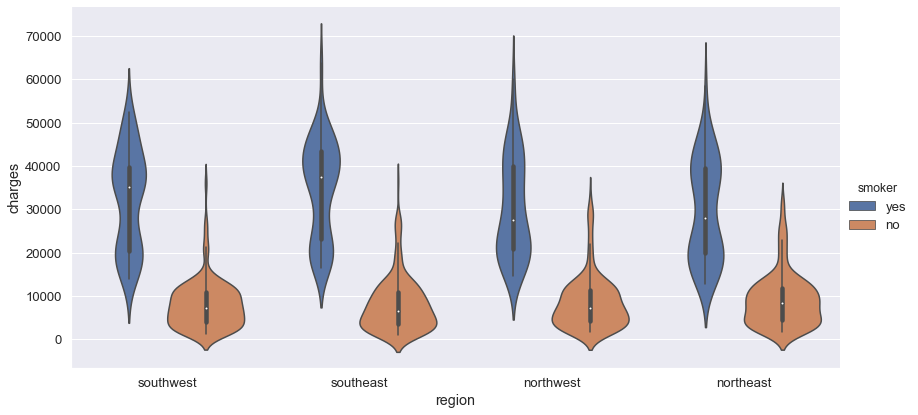

In [22]:
sns.catplot(x = 'region', y = 'charges', hue = 'smoker', data = df, kind = 'violin',
            height = 6, aspect = 2)
plt.show()

-Highest no of patients are from southeast region.
-Patients from northwest and southwest region pays higher charges.



### Feature Engineering

In [23]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
df = pd.get_dummies(df,drop_first=True)

In [34]:
X = df.drop('charges',axis=1)
y=df[['charges']]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 100)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

## linear Regression

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = lin_reg.predict(X_test)

In [40]:
y_test

,charges
12,1826.84300
306,20177.67113
318,7421.19455
815,1877.92940
157,15518.18025
...,...
713,1984.45330
1282,14283.45940
531,14043.47670
537,8825.08600


In [41]:
r2_score(y_test,y_pred)

0.7946968492150814

In [42]:
accuracy = round(r2_score(y_test,y_pred),1)
accuracy

0.8

## Decision Tree

In [43]:
regressor = DecisionTreeRegressor(random_state=0,max_depth=5)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [44]:
y_pred_dt = regressor.predict(X_test)

In [45]:
r2_score(y_test,y_pred_dt)

0.8607322795765107

In [46]:
accuracy2 = round(r2_score(y_test,y_pred_dt),1)
accuracy2

0.9

In [47]:
lr = LinearRegression()

dt = DecisionTreeRegressor(max_depth = 3)



regressors = [('Linear Regression', lr),
('Decision Tree', dt)]

Linear Regression : 80 %
Decision Tree : 90 %


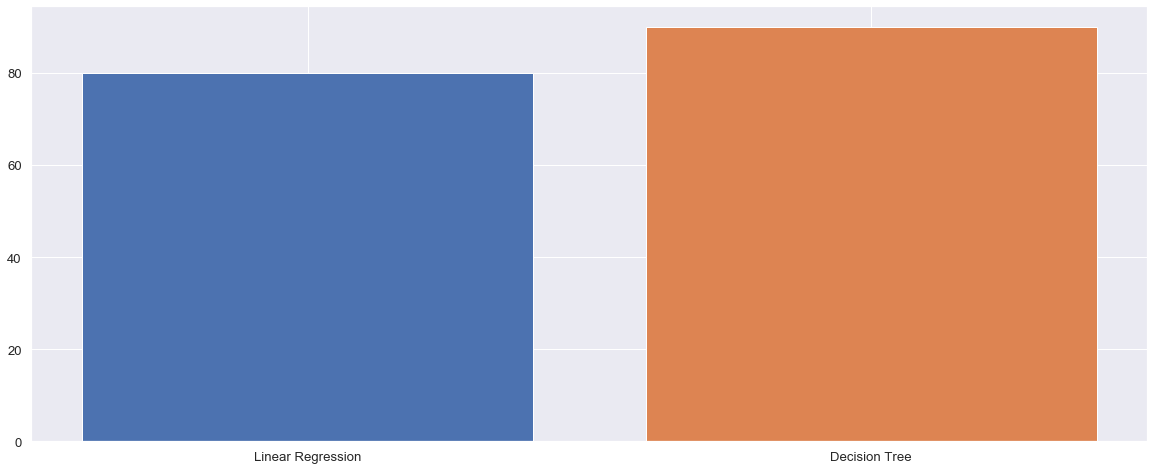

In [48]:
from sklearn.metrics import r2_score

for regressor_name, regressor in regressors:
 
    regressor.fit(X_train, y_train)    
   

    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(y_test,y_pred),1)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)
    

In [49]:
import joblib

In [50]:
joblib.dump(model, 'project.h5')

NameError: name 'model' is not defined

In [51]:
joblib.dump(scaler, 'scaler.h5')

NameError: name 'scaler' is not defined

In [52]:
test_data = [19,0,27.9,0,1,1]